In [1]:
import pandas as pd
import json
from matplotlib import pyplot as plt

In [2]:
player_rankings = pd.read_csv("rankings_1973-2017_csv.csv")
player_rankings = player_rankings.drop(columns=['rank_text'])

c:\users\mark\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
player_rankings.head()

,week_title,week_year,week_month,week_day,rank_number,move_positions,move_direction,player_age,ranking_points,tourneys_played,player_url,player_slug,player_id
0,2017.11.20,2017,11,20,1,NaN,NaN,31.0,10645,18,/en/players/rafael-nadal/n409/overview,rafael-nadal,n409
1,2017.11.20,2017,11,20,2,NaN,NaN,36.0,9605,17,/en/players/roger-federer/f324/overview,roger-federer,f324
2,2017.11.20,2017,11,20,3,3.0,up,26.0,5150,23,/en/players/grigor-dimitrov/d875/overview,grigor-dimitrov,d875
3,2017.11.20,2017,11,20,4,1.0,down,20.0,4610,25,/en/players/alexander-zverev/z355/overview,alexander-zverev,z355
4,2017.11.20,2017,11,20,5,1.0,down,24.0,4015,27,/en/players/dominic-thiem/tb69/overview,dominic-thiem,tb69


In [4]:
player_overview = pd.read_csv("player_overviews_unindexed_csv.csv")

In [5]:
player_overview.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


In [6]:
joined = player_rankings.merge(player_overview, left_on='player_id', right_on='player_id', how='left')

In [24]:
joined['flag_code'][:100].value_counts()[:15].dropna().shape

(15,)

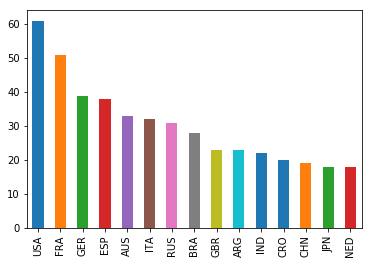

In [79]:
joined['flag_code'][101:].value_counts()[:15].plot(kind='bar')

In [68]:
flag_grouped = joined.groupby(['flag_code']).count()

In [96]:
joined['flag_code'][:100].value_counts()[:15].to_json(orient='index')

'{"FRA":10,"USA":9,"GER":8,"ESP":8,"ARG":7,"SRB":5,"RUS":5,"ITA":4,"GBR":3,"CRO":3,"AUS":3,"JPN":3,"BEL":2,"CAN":2,"AUT":2}'

In [25]:
def top100_to_json():
    my_dict = {}
    for i in range(1973, 2018):
        by_year = (joined.loc[joined['week_year'] == i]).iloc[:2000,:]
        counts = joined['flag_code'][:100].value_counts()[:15].dropna()
        json_decoded = json.loads(counts.to_json(orient='index'))
        
        my_dict[i] = json_decoded
        
    with open('top100_players.json', 'w') as json_file:
        json.dump(my_dict, json_file)
    

In [26]:
top100_to_json()
    